In [ ]:
!pip install -U -q PyDrive

from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# Part 0 Load data

In [ ]:
file = drive.CreateFile({'id':'1Y_h0_R-HTKotZGPwDUG1WqwttOc_9CXq'})
file.GetContentFile('TVdata.txt')

# https://drive.google.com/file/d/1Y_h0_R-HTKotZGPwDUG1WqwttOc_9CXq/view?usp=drive_link

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# display floats with three decimal places
# Ensure all the rows and columns are shown when printing the data frame
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
tv_df=pd.read_csv('TVdata.txt',sep=',')
tv_df.head(10)

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,300175,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250
2,361899,256165.867,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.300,115.764,58,other award,R,2.647
3,308314,196622.721,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.600,130.704,94,Oscar,R,1.667
4,307201,159841.652,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.400,105.546,37,other award,R,3.067
5,389496,135076.610,1,5,mgm,2000,Comedy,13250,60000000,32095318,5.500,98.468,37,no award,PG-13,2.750
6,385507,134155.740,1,6,lionsgate,2013,"Action,Adventure,Thriller",16188,11000000,8551228,5.200,94.336,57,other award,R,2.740
7,380517,116906.008,1,7,lionsgate,2014,"Western,Drama",24321,16000000,2428883,6.600,123.303,68,other award,R,3.003
8,369857,116871.122,2,9,lionsgate,2013,"Thriller,Crime,Western",119679,45000000,12026670,6.400,107.213,54,other award,R,1.822
9,393463,111565.597,2,7,lionsgate,2009,"Action,Adventure,Sci-Fi,Fantasy,Thriller",0,0,0,0.000,94.748,0,other award,R,2.080


# Part 1 Data Exploration

## 1.1 Overview

In [ ]:
# Copy the data frame to avoid editing the original data
tv_df_copy=tv_df.copy()

In [ ]:
tv_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   int64  
 8   budget                         4226 non-null   int64  
 9   boxoffice                      4226 non-null   int64  
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   i

In [ ]:
# Check for null values
tv_df_copy.isnull().sum()

,0
video_id,0
cvt_per_day,0
weighted_categorical_position,0
weighted_horizontal_poition,0
import_id,0
release_year,0
genres,0
imdb_votes,0
budget,0
boxoffice,0


In [ ]:
# rename the columns to improve readibility
tv_df_copy = tv_df_copy.rename(columns={'weighted_horizontal_poition': 'horizontal_position'})
tv_df_copy = tv_df_copy.rename(columns={'weighted_categorical_position': 'vertical_position'})

In [ ]:
# Check for the number of unique values for each column
tv_df_copy.nunique()

,0
video_id,4226
cvt_per_day,4226
vertical_position,37
horizontal_position,68
import_id,4
release_year,97
genres,1165
imdb_votes,2282
budget,253
boxoffice,410


In [ ]:
#Check for duplicated videos
tv_df_copy['video_id'].duplicated().sum()

np.int64(0)

In [ ]:
tv_df_copy.drop('video_id',axis=1,inplace=True)

In [ ]:
tv_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cvt_per_day          4226 non-null   float64
 1   vertical_position    4226 non-null   int64  
 2   horizontal_position  4226 non-null   int64  
 3   import_id            4226 non-null   object 
 4   release_year         4226 non-null   int64  
 5   genres               4226 non-null   object 
 6   imdb_votes           4226 non-null   int64  
 7   budget               4226 non-null   int64  
 8   boxoffice            4226 non-null   int64  
 9   imdb_rating          4226 non-null   float64
 10  duration_in_mins     4226 non-null   float64
 11  metacritic_score     4226 non-null   int64  
 12  awards               4226 non-null   object 
 13  mpaa                 4226 non-null   object 
 14  star_category        4226 non-null   float64
dtypes: float64(4), int64(7), object(4)
mem

## 1.2 Distribution of numerical data

In [ ]:
tv_df_copy.describe(percentiles=[0.1,0.25,0.50,0.75,0.95])

,cvt_per_day,vertical_position,horizontal_position,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,4218.630,7.783,28.104,2001.057,6462.924,2150743.439,2536338.472,5.257,89.556,15.974,0.955
std,13036.080,6.134,11.864,17.497,31596.007,7176604.483,8243516.266,2.123,21.086,26.205,0.955
min,2.188,1.000,1.000,1916.000,0.000,0.000,0.000,0.000,4.037,0.000,0.000
10%,141.985,3.000,13.000,1974.000,8.000,0.000,0.000,2.300,62.391,0.000,0.000
25%,351.169,4.000,20.000,1998.000,81.000,0.000,0.000,4.300,82.602,0.000,0.000
50%,1193.500,6.000,28.000,2008.000,535.000,0.000,0.000,5.800,90.730,0.000,1.000
75%,3356.789,9.000,36.000,2012.000,3053.000,1500000.000,0.000,6.800,99.500,41.000,1.667
95%,14692.834,22.000,48.000,2015.000,26199.500,12000000.000,8551228.000,7.800,119.131,65.000,2.597
max,307127.606,41.000,70.000,2017.000,948630.000,107000000.000,184208848.000,10.000,246.017,100.000,4.000


There are zero values in several columns

## Missing Values

According to pervious analysis there's no null value in the data set, the only missing value we need to deal with is the zero values. I would impute the zero values using means.

In [ ]:
zero_value_columns = tv_df_copy.columns[(tv_df_copy == 0).any()]
print("Columns with zero values:")
zero_value_columns

Columns with zero values:


Index(['imdb_votes', 'budget', 'boxoffice', 'imdb_rating', 'metacritic_score',
       'star_category'],
      dtype='object')

In [ ]:
# Understand the percentage of zero values in each column
zero_ratio_series=(tv_df_copy == 0).sum(axis=0)/tv_df_copy.shape[0]
zero_ratio_series

,0
cvt_per_day,0.000
vertical_position,0.000
horizontal_position,0.000
import_id,0.000
release_year,0.000
genres,0.000
imdb_votes,0.081
budget,0.581
boxoffice,0.756
imdb_rating,0.081


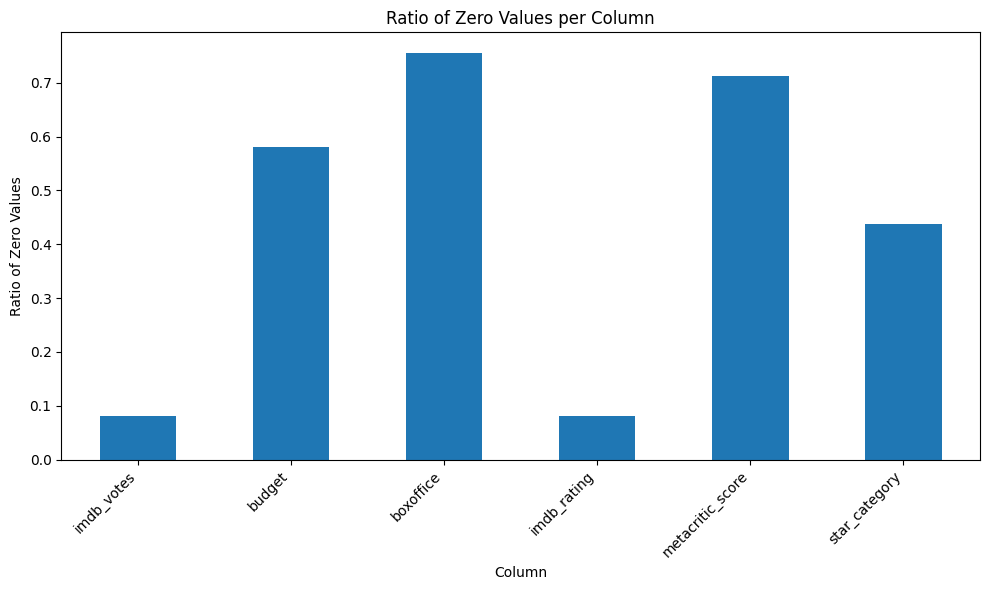

In [ ]:
#Visualize the zero proportions
zero_ratio_cols=zero_ratio_series[['imdb_votes','budget','boxoffice','imdb_rating','metacritic_score','star_category']]

fig, axes = plt.subplots(figsize=(10, 6))
zero_ratio_cols.plot(kind='bar', ax=axes)
plt.title('Ratio of Zero Values per Column')
plt.xlabel('Column')
plt.ylabel('Ratio of Zero Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Filling zero values using mean values
# Existence of zero values in imdb_votes and imdb_rating is considered reasonable for new films
tv_df_fill=tv_df_copy.copy()
tv_df_fill[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes','imdb_rating']] = tv_df_fill[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes','imdb_rating']].replace(0, np.nan)
tv_df_fill['budget'].fillna(tv_df_fill['budget'].mean(), inplace=True)
tv_df_fill['boxoffice'].fillna(tv_df_fill['boxoffice'].mean(), inplace=True)
tv_df_fill['metacritic_score'].fillna(tv_df_fill['metacritic_score'].mean(), inplace=True)
tv_df_fill['star_category'].fillna(tv_df_fill['star_category'].mean(), inplace=True)
tv_df_fill['imdb_votes'].fillna(tv_df_fill['imdb_votes'].mean(), inplace=True)
tv_df_fill['imdb_rating'].fillna(tv_df_fill['imdb_rating'].mean(), inplace=True)

/tmp/ipython-input-1269191941.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tv_df_fill['budget'].fillna(tv_df_fill['budget'].mean(), inplace=True)
/tmp/ipython-input-1269191941.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
tv_df_fill.to_csv("prime_video_clean.csv", index=False, encoding="utf-8")
from google.colab import files
files.download("prime_video_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Correlation between features

<Axes: >

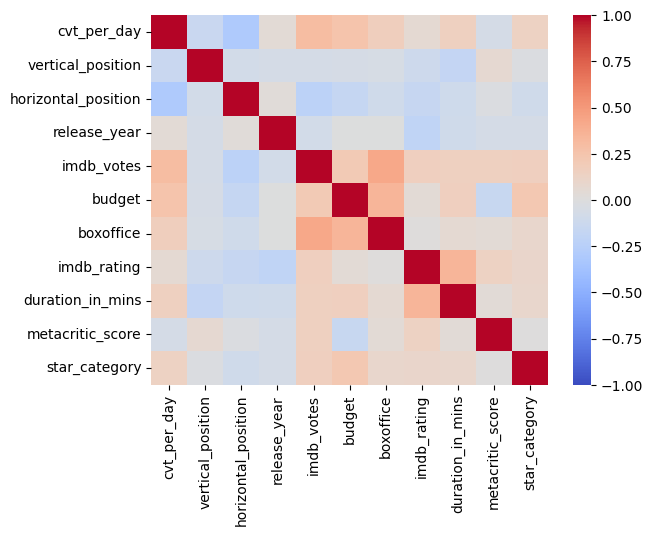

In [ ]:
#Understand the correlation between features using pearson correlation
correlation=tv_df_fill[['cvt_per_day','vertical_position','horizontal_position'
               ,'release_year', 'imdb_votes', 'budget', 'boxoffice' ,'imdb_rating',
               'duration_in_mins', 'metacritic_score', 'star_category']].corr()
sns.heatmap(correlation,cmap='coolwarm',center=0,vmin=-1, vmax=1)

## Distribution of imdb_votes, budget, and boxoffice

<Axes: xlabel='boxoffice'>

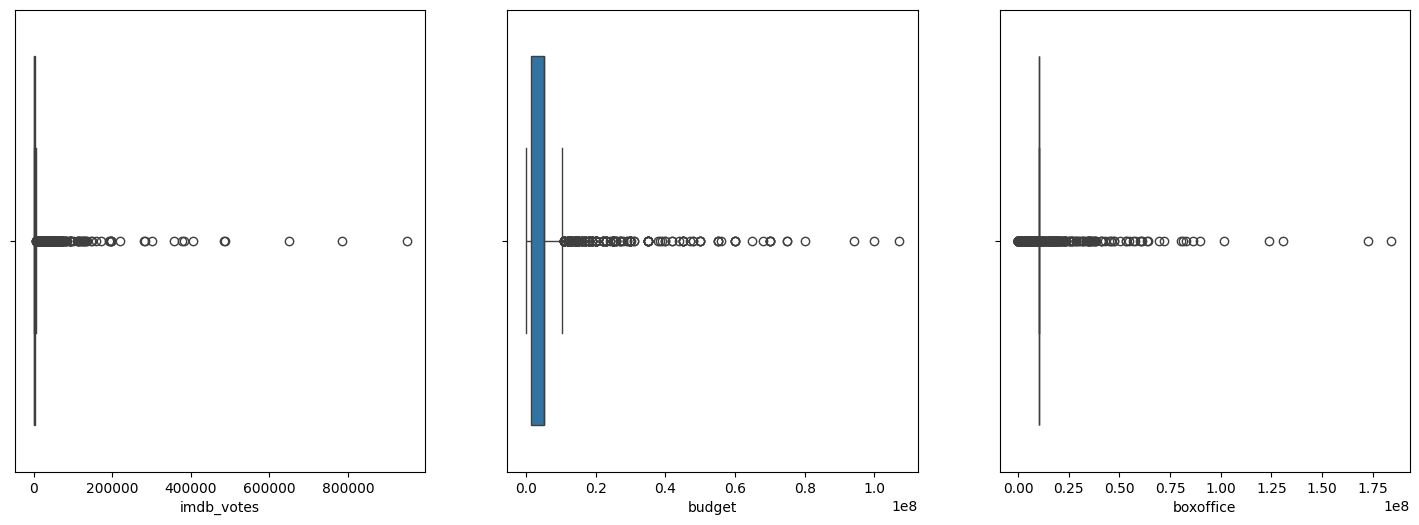

In [ ]:
num_fig=plt.figure(figsize=(18,6))
ax1=num_fig.add_subplot(131)
sns.boxplot(x=tv_df_fill['imdb_votes'],ax=ax1)

ax2=num_fig.add_subplot(132)
sns.boxplot(x=tv_df_fill['budget'],ax=ax2)

ax3=num_fig.add_subplot(133)
sns.boxplot(x=tv_df_fill['boxoffice'],ax=ax3)

## Distribution of cvt_per_day

In [ ]:
tv_df_fill['cvt_per_day'].describe([0.15,0.30,0.45,0.60,0.75])

,cvt_per_day
count,4226.000
mean,4218.630
std,13036.080
min,2.188
15%,201.283
30%,476.234
45%,969.859
50%,1193.500
60%,1771.111
75%,3356.789


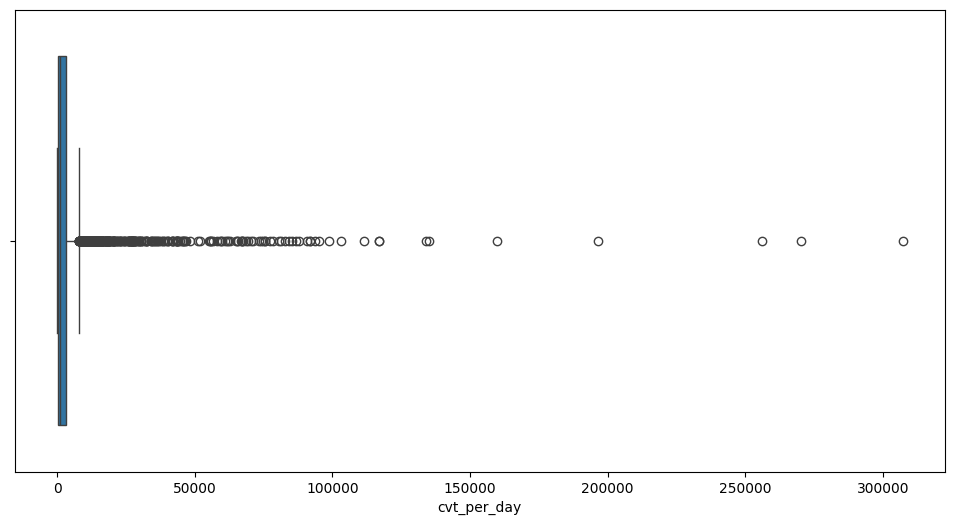

In [ ]:
cvt_fig = plt.figure(figsize=(12,6))
ax1=cvt_fig.add_subplot(111)
sns.boxplot(x=tv_df_fill['cvt_per_day'],ax=ax1)
plt.show()

## 1.3 Distribution of categorical features

In [ ]:
tv_df_fill.select_dtypes(include=['object']).columns

Index(['import_id', 'genres', 'awards', 'mpaa'], dtype='object')

The categorical features are import_id,genres,awards,and mpaa

## Outliers

In [ ]:
tv_df_clean=tv_df_fill.copy()

In [ ]:
# use upper and lower bounds to fill with outliers

#cvt_per_day
cvt_q1=tv_df_clean['cvt_per_day'].quantile(0.25)
cvt_q3=tv_df_clean['cvt_per_day'].quantile(0.75)
cvt_iqr=cvt_q3-cvt_q1
cvt_lower_bound=cvt_q1-1.5*cvt_iqr
cvt_upper_bound=cvt_q3+1.5*cvt_iqr
tv_df_clean.loc[tv_df_clean['cvt_per_day']>cvt_upper_bound,['cvt_per_day']]=cvt_upper_bound

#budget
budget_q1=tv_df_clean['budget'].quantile(0.25)
budget_q3=tv_df_clean['budget'].quantile(0.75)
budget_iqr=budget_q3-budget_q1
budegt_lower_bound=budget_q1-1.5*budget_iqr
budget_upper_bound=budget_q3+1.5*budget_iqr
tv_df_clean.loc[tv_df_clean['budget']>budget_upper_bound,['budget']]=budget_upper_bound

#imdb_vote
votes_q1=tv_df_clean['imdb_votes'].quantile(0.25)
votes_q3=tv_df_clean['imdb_votes'].quantile(0.75)
votes_iqr=votes_q3-votes_q1
votes_lower_bound=votes_q1-1.5*votes_iqr
votes_upper_bound=votes_q3+1.5*votes_iqr
tv_df_clean.loc[tv_df_clean['imdb_votes']>votes_upper_bound,['imdb_votes']]=votes_upper_bound
tv_df_clean.loc[tv_df_clean['imdb_votes']<votes_lower_bound,['imdb_votes']]=votes_lower_bound

#boxoffice
boxoffice_q1 = tv_df_clean['boxoffice'].quantile(0.25)
boxoffice_q3 = tv_df_clean['boxoffice'].quantile(0.75)
boxoffice_iqr = boxoffice_q3 - boxoffice_q1
boxoffice_lower_bound = boxoffice_q1 - 1.5 * boxoffice_iqr
boxoffice_upper_bound = boxoffice_q3 + 1.5 * boxoffice_iqr
tv_df_clean.loc[tv_df_clean['boxoffice'] > boxoffice_upper_bound, ['boxoffice']] = boxoffice_upper_bound

In [ ]:
tv_df_clean.describe()

,cvt_per_day,vertical_position,horizontal_position,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,2293.763,7.783,28.104,2001.057,2002.031,4292034.985,9628399.214,5.257,89.556,55.605,1.695
std,2533.737,6.134,11.864,17.497,2711.126,2552631.881,2057941.354,2.123,21.086,7.314,0.453
min,2.188,1.000,1.000,1916.000,0.000,1.000,1316.000,0.000,4.037,1.000,1.000
25%,351.169,4.000,20.000,1998.000,81.000,1500000.000,10386207.734,4.300,82.602,55.605,1.575
50%,1193.500,6.000,28.000,2008.000,535.000,5129256.081,10386207.734,5.800,90.730,55.605,1.695
75%,3356.789,9.000,36.000,2012.000,3053.000,5129256.081,10386207.734,6.800,99.500,55.605,1.695
max,7865.219,41.000,70.000,2017.000,7511.000,10573140.202,10386207.734,10.000,246.017,100.000,4.000


## Distribution of import_id, awards, and mpaa

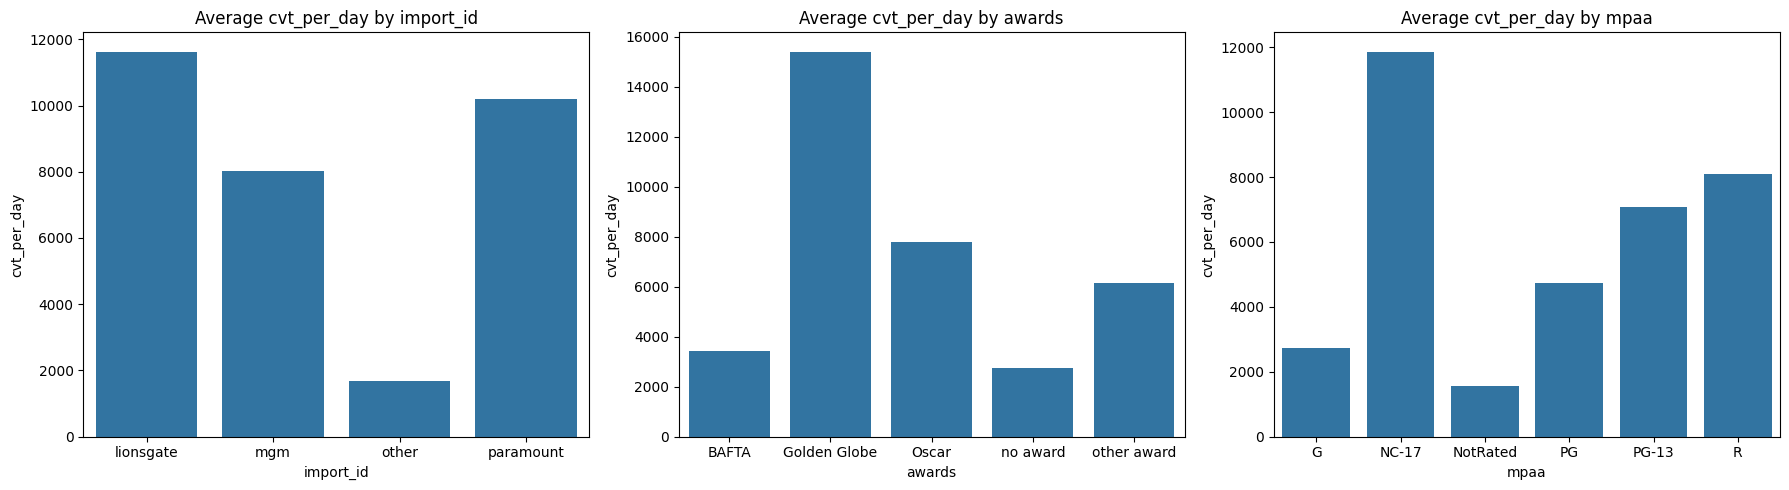

In [ ]:
import_id_cvt = tv_df_fill.groupby('import_id')['cvt_per_day'].mean().reset_index()
awards_cvt = tv_df_fill.groupby('awards')['cvt_per_day'].mean().reset_index()
mpaa_cvt = tv_df_fill.groupby('mpaa')['cvt_per_day'].mean().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))


sns.barplot(data=import_id_cvt, x='import_id', y='cvt_per_day', ax=axes[0])
axes[0].set_title('Average cvt_per_day by import_id')
axes[0].set_xlabel('import_id')
axes[0].set_ylabel('cvt_per_day')


sns.barplot(data=awards_cvt, x='awards', y='cvt_per_day', ax=axes[1])
axes[1].set_title('Average cvt_per_day by awards')
axes[1].set_xlabel('awards')
axes[1].set_ylabel('cvt_per_day')


sns.barplot(data=mpaa_cvt, x='mpaa', y='cvt_per_day', ax=axes[2])
axes[2].set_title('Average cvt_per_day by mpaa')
axes[2].set_xlabel('mpaa')
axes[2].set_ylabel('cvt_per_day')


plt.tight_layout()
plt.show()

In [ ]:
# Apply one-hot encoding to convert into numerical features
d_import_id = pd.get_dummies(tv_df_fill['import_id']).astype(np.int64)
d_awards = pd.get_dummies(tv_df_fill['awards']).astype(np.int64)
d_mpaa = pd.get_dummies(tv_df_fill['mpaa']).astype(np.int64)

## Distribution of genres

In [ ]:
tv_df_fill['genres'].head()

,genres
0,"Action,Thriller,Drama"
1,"Comedy,Crime,Thriller"
2,"Crime,Drama"
3,"Thriller,Drama,War,Documentary,Mystery,Action"
4,"Crime,Thriller,Mystery,Documentary"


In [ ]:
#Apply one-hot encoding to 'genres' column, splitting on commas
gen_split=tv_df_fill['genres'].str.get_dummies(sep=',')

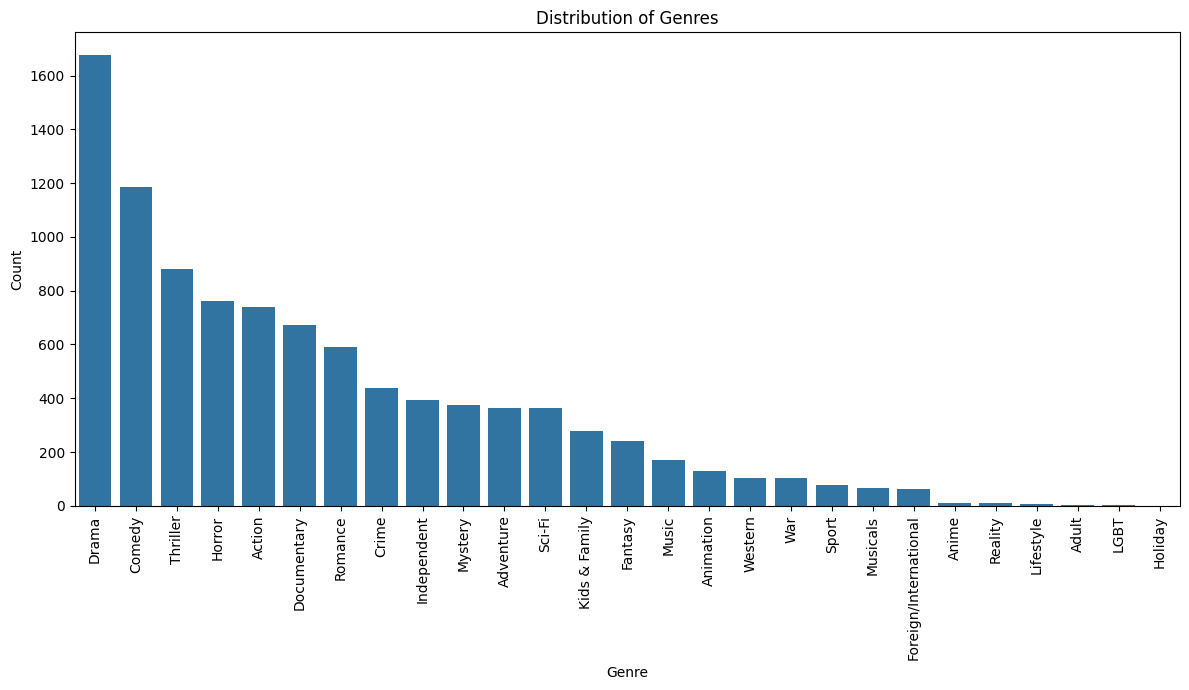

In [ ]:
genre_counts = gen_split.sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=genre_counts.index, y=genre_counts.values, ax=ax)
ax.set_title('Distribution of Genres')
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=90)
fig.tight_layout()
plt.show()

In [ ]:
#Combine low frequency genres into one column
gen_split['misc_genres']=gen_split['Anime']|gen_split['Reality']|gen_split['Lifestyle']|gen_split['Adult']|gen_split['LGBT']|gen_split['Holiday']
gen_split.drop(['Anime','Reality','Lifestyle','Adult','LGBT','Holiday'],axis=1,inplace=True)
gen_split.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,misc_genres
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


## Distribution of release year

In [ ]:
#Understand the distribution of release_year to determine bins
tv_df_fill['release_year'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,release_year
0.100,1974.000
0.200,1991.000
0.300,2001.000
0.400,2006.000
0.500,2008.000
0.600,2010.000
0.700,2012.000
0.800,2013.000
0.900,2014.000


In [ ]:
unique_years=tv_df_fill['release_year'].unique()
unique_years.sort()
unique_years

array([1916, 1920, 1921, 1922, 1923, 1925, 1926, 1927, 1928, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [ ]:
year_bin=pd.qcut(tv_df_fill['release_year'],10)
year_bin = year_bin.map(lambda x: f"{int(x.left)+1}-{int(x.right)}")
year_encoded=pd.get_dummies(year_bin).astype(np.int64)
year_encoded.head()

,1916-1974,1975-1991,1992-2001,2002-2006,2007-2008,2009-2010,2011-2012,2013-2013,2014-2014,2015-2017
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0


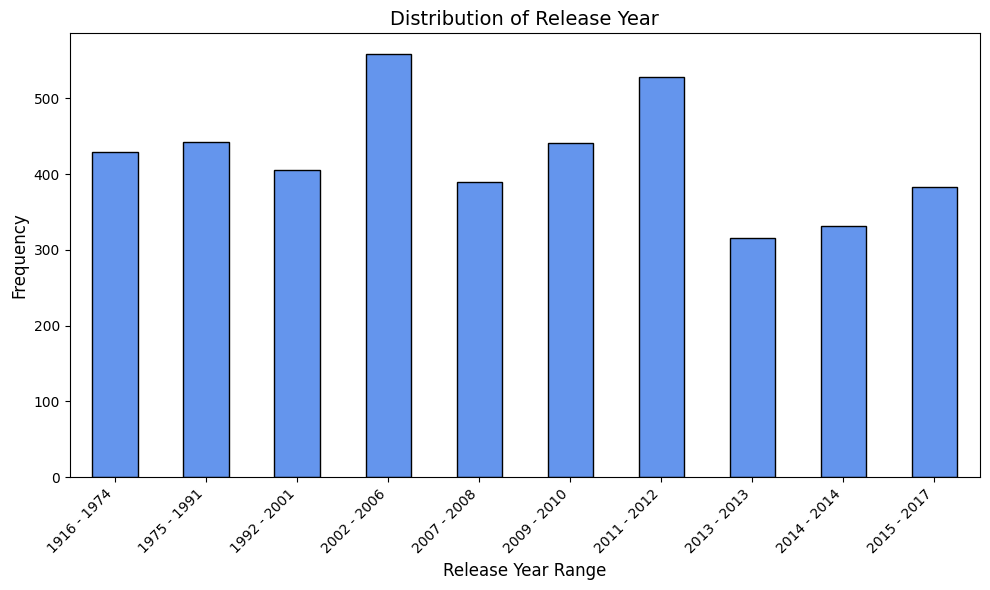

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

year_count.plot(kind='bar', ax=ax, color='cornflowerblue', edgecolor='black')
ax.set_title('Distribution of Release Year', fontsize=14)
ax.set_xlabel('Release Year Range', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.set_xticklabels(ax.get_xticklabels(), ha='right')

fig.tight_layout()

plt.show()

/tmp/ipython-input-1132072005.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cvt_per_day_by_year_bin = tv_df_fill.groupby(year_bin)['cvt_per_day'].mean()


Average cvt_per_day by release year bin:
release_year
1916-1974   1524.972
1975-1991   5091.296
1992-2001   5580.923
2002-2006   4237.843
2007-2008   5162.017
2009-2010   4680.982
2011-2012   4047.397
2013-2013   6125.613
2014-2014   3781.926
2015-2017   2302.572
Name: cvt_per_day, dtype: float64


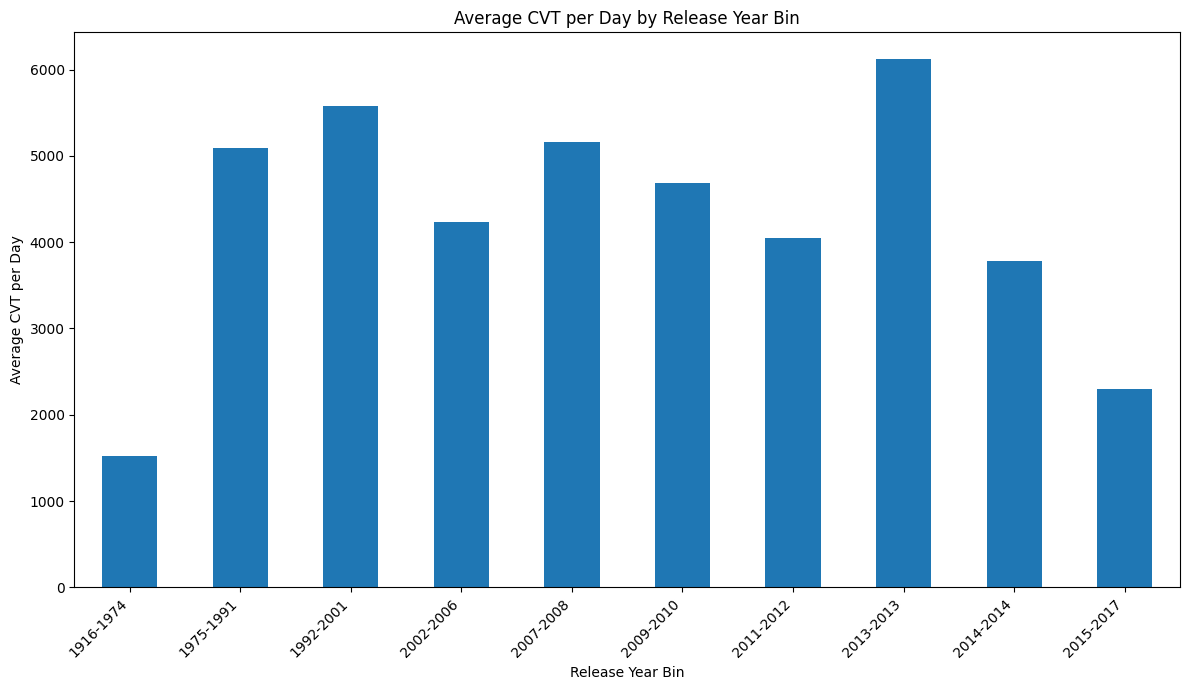

In [ ]:
#Calculate the mean cvt_per_day for each release year bin
cvt_per_day_by_year_bin = tv_df_fill.groupby(year_bin)['cvt_per_day'].mean()


print("Average cvt_per_day by release year bin:")
print(cvt_per_day_by_year_bin)

#Create a bar plot to visualize the result
fig, ax = plt.subplots(figsize=(12, 7))
cvt_per_day_by_year_bin.plot(kind='bar', ax=ax)
ax.set_title('Average CVT per Day by Release Year Bin')
ax.set_xlabel('Release Year Bin')
ax.set_ylabel('Average CVT per Day')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
tv_df_copy.columns

Index(['cvt_per_day', 'vertical_position', 'horizontal_position', 'import_id',
       'release_year', 'genres', 'imdb_votes', 'budget', 'boxoffice',
       'imdb_rating', 'duration_in_mins', 'metacritic_score', 'awards', 'mpaa',
       'star_category'],
      dtype='object')

In [ ]:
tv_df_fill.columns

Index(['cvt_per_day', 'vertical_position', 'horizontal_position', 'import_id',
       'release_year', 'genres', 'imdb_votes', 'budget', 'boxoffice',
       'imdb_rating', 'duration_in_mins', 'metacritic_score', 'awards', 'mpaa',
       'star_category'],
      dtype='object')

In [ ]:
#Concatenate the encoded columns to the original data frame
temp_df=tv_df_fill.drop(['import_id','awards','mpaa','genres','release_year'],axis=1)
tv_df_encoded=pd.concat([temp_df,d_import_id,d_awards,d_mpaa,year_encoded,gen_split],axis=1)
tv_df_encoded.head(10)

,cvt_per_day,vertical_position,horizontal_position,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,lionsgate,mgm,other,paramount,BAFTA,Golden Globe,Oscar,no award,other award,G,NC-17,NotRated,PG,PG-13,R,1916-1974,1975-1991,1992-2001,2002-2006,2007-2008,2009-2010,2011-2012,2013-2013,2014-2014,2015-2017,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,misc_genres
0,307127.606,1,3,69614,15000000.000,42930462.000,6.500,112.301,51.000,1.710,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,270338.426,1,3,46705,15000000.000,3301046.000,6.500,94.983,41.000,3.250,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,256165.867,1,3,197596,26000000.000,37397291.000,7.300,115.764,58.000,2.647,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,196622.721,3,4,356339,15000000.000,15700000.000,7.600,130.704,94.000,1.667,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,159841.652,1,3,46720,27220000.000,8551228.000,6.400,105.546,37.000,3.067,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
5,135076.610,1,5,13250,60000000.000,32095318.000,5.500,98.468,37.000,2.750,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,134155.740,1,6,16188,11000000.000,8551228.000,5.200,94.336,57.000,2.740,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,116906.008,1,7,24321,16000000.000,2428883.000,6.600,123.303,68.000,3.003,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,116871.122,2,9,119679,45000000.000,12026670.000,6.400,107.213,54.000,1.822,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
9,111565.597,2,7,0,5129256.081,10386207.734,0.000,94.748,55.605,2.080,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


## Split data

In [ ]:
#Split data into training set and testing set
from sklearn.model_selection import train_test_split
x,y=tv_df_encoded.drop('cvt_per_day',axis=1),tv_df_encoded['cvt_per_day']
x_train,x_test=train_test_split(x,test_size=0.3,random_state=23)
y_train,y_test=train_test_split(y,test_size=0.3,random_state=23)

## Scaling

In [ ]:
 from sklearn.preprocessing import MinMaxScaler
scale_lst=x_train.select_dtypes(include=[float]).columns
scaler=MinMaxScaler()
x_train[scale_lst]=scaler.fit_transform(x_train[scale_lst])
x_test[scale_lst]=scaler.fit_transform(x_test[scale_lst])

# Part 2 Model training

## Ridge linear regression

In [ ]:
#Fit data using ridge regression model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [ ]:
# Find the hyperparameter at best performance
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_ridge_model = grid_search.best_estimator_

print(f"Best alpha for Ridge regression: {best_alpha}")

Best alpha for Ridge regression: 10


In [ ]:
print(best_ridge_model)

Ridge(alpha=10)


In [ ]:
# Evaluate the best model on the test set
y_pred_ridge = best_ridge_model.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge=np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"Root mean squared error (Ridge): {rmse_ridge}")
print(f"R-squared (Ridge): {r2_ridge}")

Mean Squared Error (Ridge): 132224968.24329638
Root mean squared error (Ridge): 11498.9116112481
R-squared (Ridge): 0.2641917445159516


## Lasso linear regression

In [ ]:
#Fit data using Lasso regression model
Lasso_model = Lasso()
Lasso_model.fit(x_train, y_train)

Lasso()

In [ ]:
# Find the hyperparameter at best performance
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_lasso_model = grid_search.best_estimator_

print(f"Best alpha for lasso regression: {best_alpha}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.676e+09, tolerance: 4.104e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.664e+09, tolerance: 4.384e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.119e+09, tolerance: 3.136e

Best alpha for lasso regression: 10


In [ ]:
print(best_lasso_model)

Lasso(alpha=10)


In [ ]:
y_pred_lasso=best_lasso_model.predict(x_test)
mse_lasso=mean_squared_error(y_test, y_pred_lasso)
rmse_lasso=np.sqrt(mse_lasso)
r2_lasso=r2_score(y_test,y_pred_lasso)
print(f"Mean Squared Error (Lasso): {mse_lasso}")
print(f"Root mean squared error (Lasso): {rmse_lasso}")
print(f"R-squared (Lasso): {r2_lasso}")

Mean Squared Error (Lasso): 2.849425448759947e+22
Root mean squared error (Lasso): 168802412564.51126
R-squared (Lasso): -158565420467793.62


## Random Forest

In [ ]:
#Fit data using random forest model
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
#Find the hyperparameter at best performance
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
}
grid_search_rf=GridSearchCV(
    RandomForestRegressor(random_state=23),
    param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_rf.fit(x_train,y_train)
best_params_rf=grid_search_rf.best_params_
print(f"Best hyperparameters for Random Forest: {best_params_rf}")
best_rf_model = grid_search_rf.best_estimator_

Best hyperparameters for Random Forest: {'max_depth': 20, 'n_estimators': 500}


In [ ]:
y_pred_rf=best_rf_model.predict(x_test)
mse_rf=mean_squared_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mse_rf)
r2_rf=r2_score(y_test,y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"Root mean squared error(Random Forest):{rmse_rf}")
print(f"R-squared (Random Forest): {r2_rf}")

Mean Squared Error (Random Forest): 10057392.63338718
Root mean squared error(Random Forest):3171.339249179624
R-squared (Random Forest): 0.9440324121335841


## Model Comparison

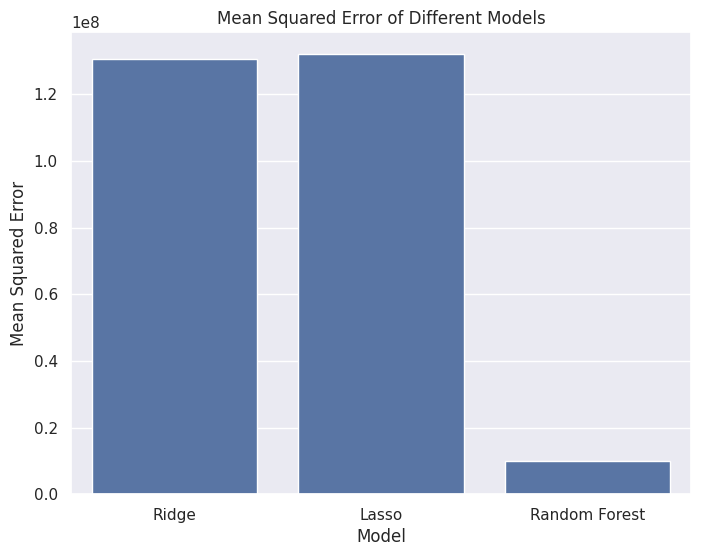

In [ ]:
models = ['Ridge', 'Lasso', 'Random Forest']
mse_values = [mse_ridge, mse_lasso, mse_rf]

# Plotting the MSE
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=mse_values)
plt.title('Mean Squared Error of Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

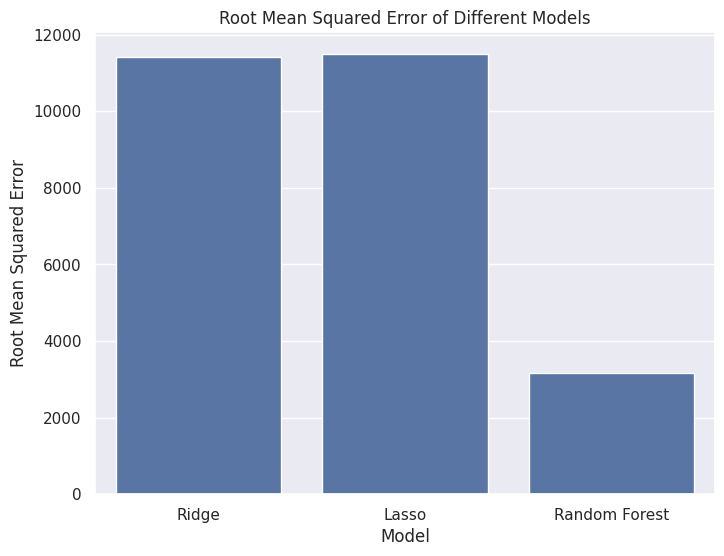

In [ ]:
models = ['Ridge', 'Lasso', 'Random Forest']
rmse_values = [rmse_ridge, rmse_lasso, rmse_rf]
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=rmse_values)
plt.title('Root Mean Squared Error of Different Models')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error')
plt.show()

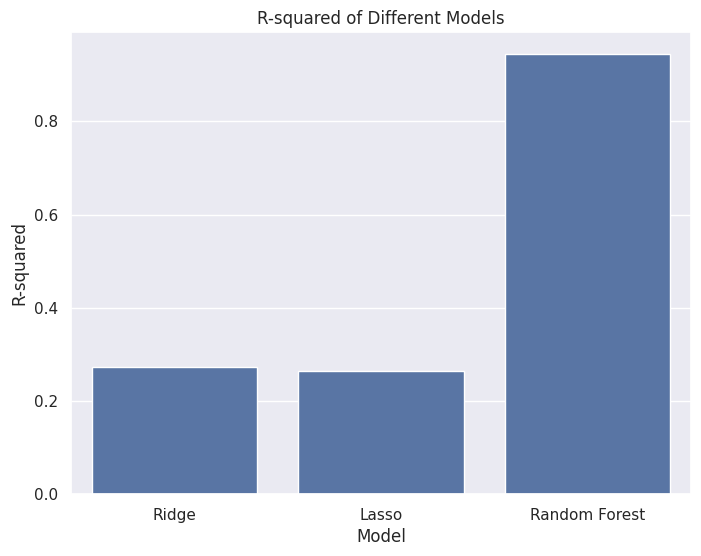

In [ ]:
models = ['Ridge', 'Lasso', 'Random Forest']
r2_values = [r2_ridge, r2_lasso, r2_rf]

# Plotting the R-squared
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=r2_values)
plt.title('R-squared of Different Models')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.show()

Random forest has the best performance in predicting the result

# Part 3 Feature Importance

In [ ]:
# Identify key features for predicting view time
x=tv_df_clean.copy().drop('cvt_per_day',axis=1)
y=tv_df['cvt_per_day']
best_rf_model.fit(x,y)
importance=best_rf_model.feature_importances_
importance

array([0.28813015, 0.11632266, 0.1665666 , 0.02066832, 0.0413974 ,
       0.03068123, 0.04277068, 0.03789054, 0.03854784, 0.0628725 ,
       0.01353559, 0.02598877, 0.00230537, 0.00086657, 0.0009283 ,
       0.00248092, 0.00401588, 0.00071357, 0.00211248, 0.00155041,
       0.0022089 , 0.00039759, 0.00124761, 0.00142779, 0.00427608,
       0.00354592, 0.00385706, 0.00239737, 0.03445914, 0.00229194,
       0.00220613, 0.00183168, 0.00203004, 0.00378366, 0.0037895 ,
       0.00582819, 0.0032773 , 0.00135966, 0.00129586, 0.00382494,
       0.00178572, 0.00171842, 0.00153008, 0.00140126, 0.00145172,
       0.00333064, 0.00153842, 0.00156159])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# print each feature with its corresponding importance in descending order
feature_importance = pd.Series(importance, index=x.columns).sort_values(ascending=False)

for feature, imp in feature_importance.items():
  print(f"{feature}: {imp:.3f}")


vertical_position: 0.288
imdb_votes: 0.167
horizontal_position: 0.116
lionsgate: 0.063
duration_in_mins: 0.043
boxoffice: 0.041
star_category: 0.039
metacritic_score: 0.038
2012-2013: 0.034
imdb_rating: 0.031
other: 0.026
budget: 0.021
mgm: 0.014
Documentary: 0.006
2001-2006: 0.004
other award: 0.004
2008-2010: 0.004
Kids & Family: 0.004
Crime: 0.004
Comedy: 0.004
2006-2008: 0.004
Thriller: 0.003
Drama: 0.003
no award: 0.002
2010-2012: 0.002
paramount: 0.002
2013-2014: 0.002
R: 0.002
Action: 0.002
PG: 0.002
Animation: 0.002
Adventure: 0.002
Music: 0.002
Mystery: 0.002
Western: 0.002
PG-13: 0.002
War: 0.002
Romance: 0.002
Sport: 0.001
1991-2001: 0.001
Sci-Fi: 0.001
Fantasy: 0.001
Horror: 0.001
1974-1991: 0.001
Oscar: 0.001
Golden Globe: 0.001
NotRated: 0.001
1916-1974: 0.000


#Part 4 Summary

In this project I trained models to predict the daily customer view time of Amazon prime videos. I handled missing data and applied one-hot encoding to convert categorical features into numerical form. Unimportant features are removed before model training to improve model performance. Among the models tested,random forest is shown to be the best model based on mean square error and R square score.